# NLP using LSTM

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Conv1D, GRU, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np

# Preprocessing on Data
# Reading emojis from the chat

In [4]:
import sys
#This will read emojis as well
non_bmp_map = dict.fromkeys(range(0x10000, sys.maxunicode + 1), 0xfffd)

data = open("E:/NLP in Tensorflow/RomeJulietExtract.txt",encoding="unicode-escape").read()
corpus = data.lower().split("\n")
corpus = corpus[1:]

input_data = []
i = 0
for line in corpus:
    text = line.translate(non_bmp_map)
    input_data.append(line)
#     if len(text.split("-")) == 2:
#         _,b = text.split("-")
#         if (("rp" in b) & ((len(b.split(":")) == 2))):
#             _,j = b.split(":")
#             if (not "media omitted" in j):
#                 input_data.append(j)
len(input_data)
print(input_data[:5])

['two households, both alike in dignity,', 'in fair verona, where we lay our scene,', 'from ancient grudge break to new mutiny,', 'where civil blood makes civil hands unclean.', 'from forth the fatal loins of these two foes']


In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_data)
total_words = len(tokenizer.word_index) + 1

input_sentences = []
for line in input_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram = token_list[:i+1]
        input_sentences.append(n_gram)
        
max_sequence_len = max([len(i) for i in input_sentences])
input_sentences = np.array(pad_sequences(input_sentences, padding='pre', maxlen = max_sequence_len))

training_data = input_sentences[:,:-1]
labels = input_sentences[:,-1]

training_labels = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [6]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 64)            23360     
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           258000    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 182)               36582     
_________________________________________________________________
dense_1 (Dense)              (None, 365)               66795     
Total params: 705,537
Trainable params: 705,537
Non-trainable params: 0
__________________________________________________

In [8]:
history = model.fit(training_data, training_labels, epochs = 100)

Train on 805 samples
Epoch 1/100
805/805 [==============================] - 16s 20ms/sample - loss: 7.2352 - accuracy: 0.0373
Epoch 2/100
805/805 [==============================] - 3s 4ms/sample - loss: 6.3254 - accuracy: 0.0422
Epoch 3/100
805/805 [==============================] - 3s 4ms/sample - loss: 5.9210 - accuracy: 0.0398
Epoch 4/100
805/805 [==============================] - 3s 3ms/sample - loss: 5.6963 - accuracy: 0.0385
Epoch 5/100
805/805 [==============================] - 3s 4ms/sample - loss: 5.5725 - accuracy: 0.0360
Epoch 6/100
805/805 [==============================] - 3s 3ms/sample - loss: 5.4551 - accuracy: 0.0447
Epoch 7/100
805/805 [==============================] - 3s 3ms/sample - loss: 5.3019 - accuracy: 0.0348
Epoch 8/100
805/805 [==============================] - 3s 4ms/sample - loss: 5.1628 - accuracy: 0.0460
Epoch 9/100
805/805 [==============================] - 3s 4ms/sample - loss: 5.0664 - accuracy: 0.0422
Epoch 10/100
805/805 [============================

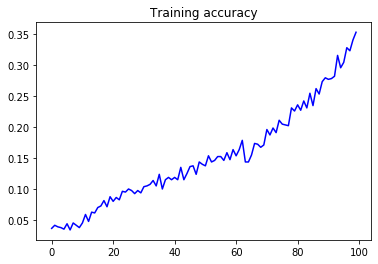

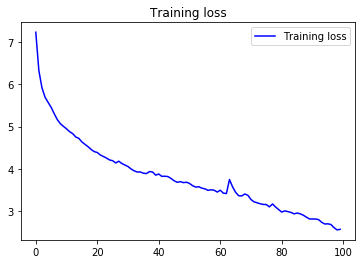

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title("Training accuracy")
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Two households, both alike"
next_words = 10
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1,padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    if output_word not in seed_text:
        seed_text += " " + output_word
print(seed_text)

Two households, both alike in dignity makes hands shall


In [ ]:
model.save_model('novelty_component.hdf5')